##### Problem Statement

In this assignment, students will be using the K-nearest neighbors algorithm to predict
how many points NBA players scored in the 2013-2014 season.
A look at the data
Before we dive into the algorithm, letâ€TMs take a look at our data. Each row in the data
contains information on how a player performed in the 2013-2014 NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
Here are some selected columns from the data:
player - name of the player
pos - the position of the player
g - number of games the player was in
gs - number of games the player started
pts - total points the player scored
There are many more columns in the data, mostly containing information about average
player game performance over the course of the season. See this site for an explanation
of the rest of them.
We can read our dataset in and figure out which columns are present:

import pandas
with open("nba_2013.csv", 'r') as csvfile:
nba = pandas.read_csv(csvfile)

In [12]:
import pandas
import numpy as np
from  sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer
import seaborn as sns
import matplotlib.pyplot as pt
from sklearn.metrics import mean_squared_error, r2_score,make_scorer

In [13]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pandas.read_csv(csvfile)

In [14]:
x_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']
y_column = ["pts"] # target column

In [15]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


##### Split data for training & testing

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(nba[x_columns],nba[y_column],train_size=.7,random_state=100)

#### Data Visualization

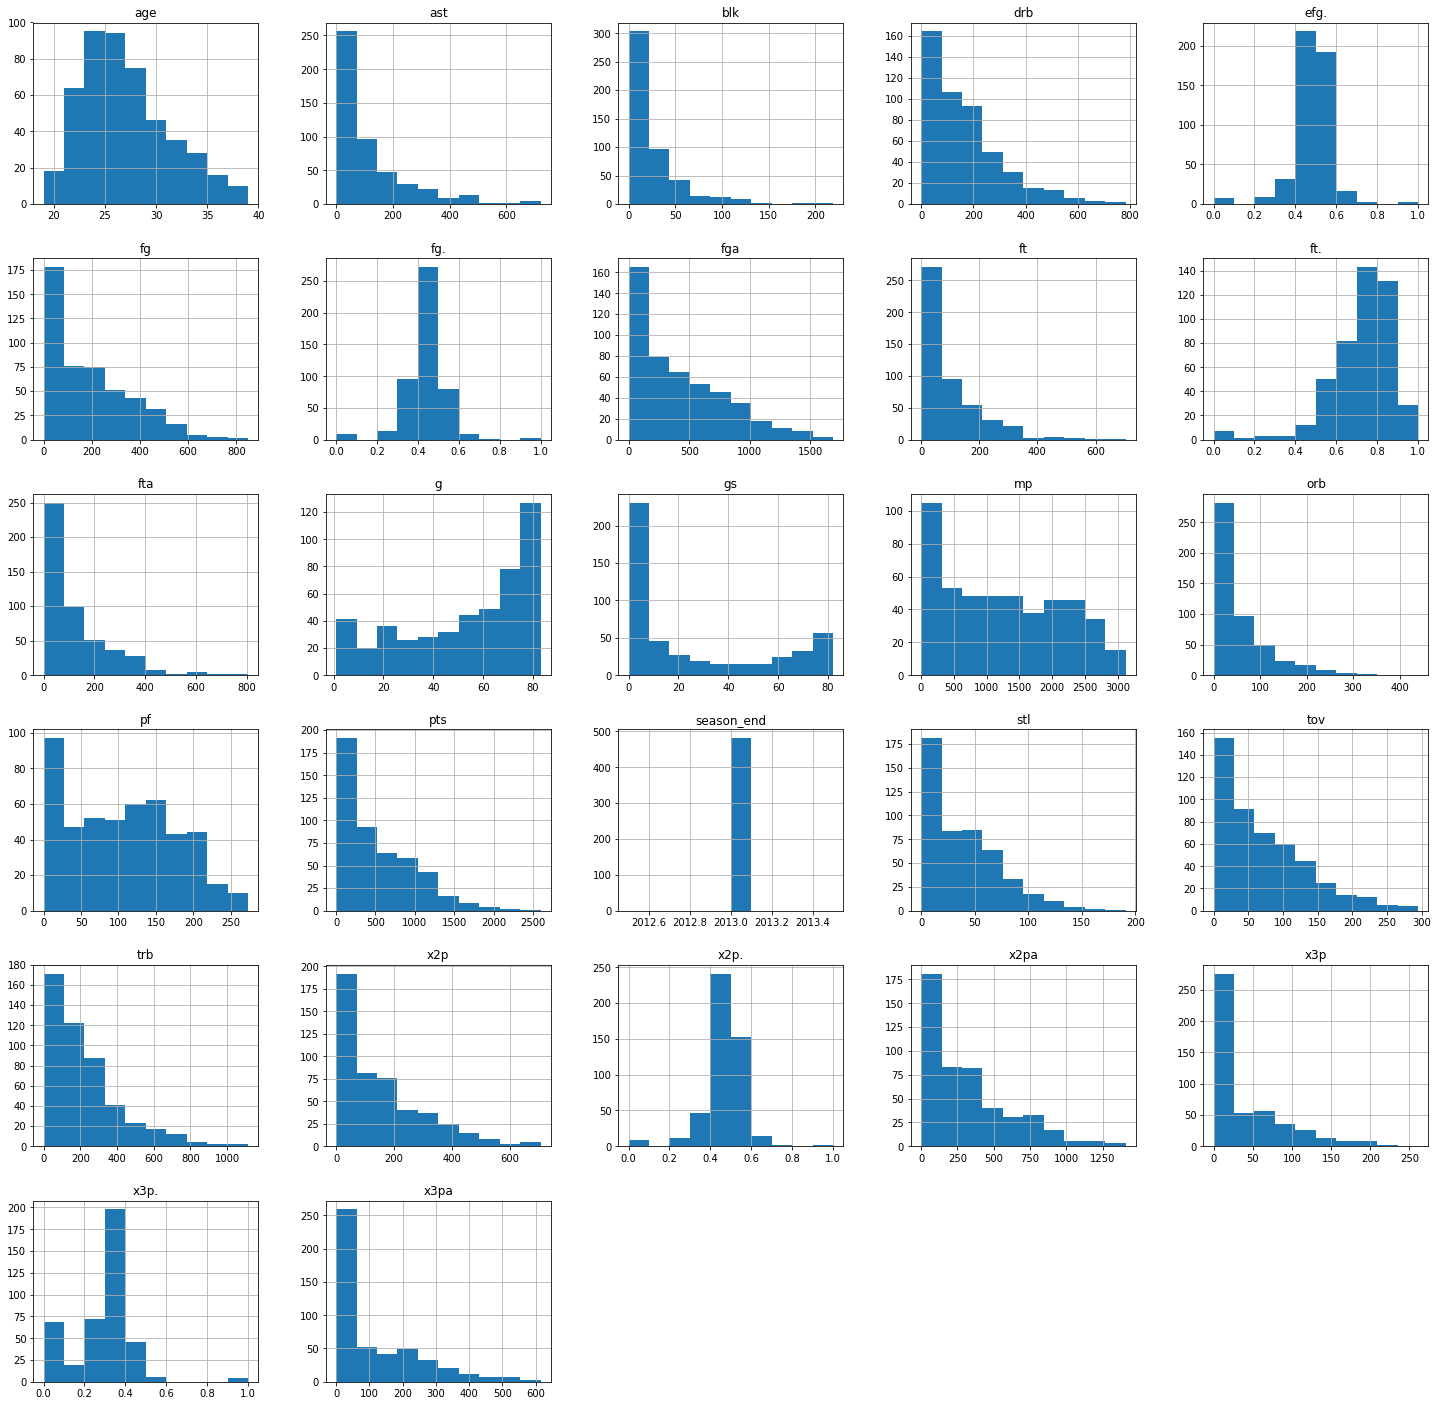

In [17]:
nba.hist(figsize=(25,25))
pt.show()

#### Feature Correlation Analysis

In [18]:
nba.corr().sort_values(['pts'])['pts']

age          -0.011910
x3p.          0.144431
x2p.          0.219348
fg.           0.248276
efg.          0.268952
ft.           0.303459
blk           0.433549
orb           0.505524
x3p           0.655342
x3pa          0.672076
trb           0.725930
g             0.728462
ast           0.738295
pf            0.778060
drb           0.784675
stl           0.797449
gs            0.810294
tov           0.912724
fta           0.918979
mp            0.927464
ft            0.927618
x2p           0.931493
x2pa          0.937036
fga           0.989211
fg            0.992041
pts           1.000000
season_end         NaN
Name: pts, dtype: float64

#### Null Values

In [19]:
nba.isnull().sum(axis=0)

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

##### Cleaning train data

In [20]:
imp = Imputer(missing_values="NaN", strategy='mean', axis=0)
X_train=imp.fit_transform(X_train)
X_test=imp.fit_transform(X_test)

##### Train data

In [21]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,np.ravel(Y_train))


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

##### Predict values

In [22]:
predictions = knn.predict(X_test)

In [23]:
predictions.astype(int)

array([ 573,  462,  201,  155,   23,  176,   96,   76,    5,   31,   62,
        127,   82,   17,  416, 1032,  362,  683,  436,  675,   57, 1404,
       1185,  931,    1,  549, 1051,    0,  311,  201,  759,  302,  427,
       1037,  241,  320,  780,   34,  118,  713,  550,  205,  606,  230,
         40,  473,   83,  908,    7,  492, 1082, 1807,  984,  721,  657,
       1885,  812,    1,  610,  849,  615,  135,  548, 1032,  266,  906,
       1114,  975, 1146,  462,   40,  932,  372,   50,  149, 1323,  458,
        762,    2,    4,  270,   83,  195,   81,  769,  571,  537,  505,
        211,   40,  897,  170, 1331,  356, 1246,  320,  149, 1997,  843,
          7,  412,  394,  454, 1511,  342,  544,  787,  189, 1214,  148,
       1526,   18,  787,  615,  352,   27,  580,  826,    0,  235,  355,
        662,  404,   18, 1398,  336,  592, 1133,  596,  744, 1054,  153,
        403,  197,  120,   41,  888,  813,  337,  561, 1063,    1,  277,
        623,   83])

In [24]:
 np.ravel(Y_test)

array([ 511,  483,  178,  150,   38,  138,   99,   97,    6,   33,   73,
        107,   99,   26,  429, 1068,  384,  665,  408,  703,   47, 1248,
       1257,  911,    0,  618, 1134,    0,  273,  273,  758,  252,  350,
       1042,  274,  338,  715,   29,  115,  770,  499,  159,  495,  270,
         27,  401,   75, 1095,   12,  579, 1081, 1560, 1069,  677,  646,
       1583,  911,    0,  638,  921,  772,  143,  588, 1007,  280, 1144,
       1107, 1068, 1080,  435,   44,  998,  303,   66,  174, 1226,  520,
        799,    7,    0,  257,   97,  197,   78,  824,  622,  492,  529,
        159,   28,  910,  159, 1249,  339, 1118,  315,  197, 2593,  760,
          3,  378,  485,  532, 1264,  286,  558,  784,  170, 1330,  178,
       1603,   15,  879,  696,  414,   25,  625,  821,    2,  265,  343,
        767,  548,   25, 1457,  352,  754, 1070,  618,  717, 1209,  190,
        298,  200,  136,   48,  967,  661,  343,  514, 1021,    2,  248,
        645,   92], dtype=int64)

##### Predictions vs Actuals

In [25]:
df = pandas.DataFrame({'Actual': np.ravel(Y_test),'Predicted':predictions.astype(int)})
df.head()

,Actual,Predicted
0,511,573
1,483,462
2,178,201
3,150,155
4,38,23


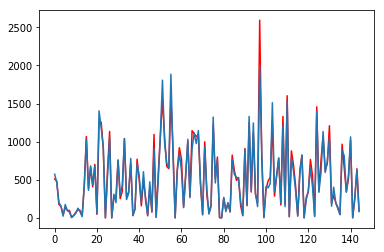

In [26]:
#pt.figure()
pt.plot(df['Actual'],color='r',label='Actual',)
pt.plot(df['Predicted'],label='Predicted')
pt.show()
#df['Actual']

In [27]:
knn.score(X_test,Y_test)


0.9624372010810966

In [28]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, predictions))

Mean squared error: 7610.72
Variance score: 0.96
